In [1]:
from torch import load
import numpy as np

In [2]:
# If you haven't trained a model yet, please go to the file 'baryons_train.ipynb' first!
model = load('../models/test_19_4.pt')
model.eval()

BaryonModel(
  (linear_in): Linear(in_features=141, out_features=141, bias=True)
  (linear_1): Linear(in_features=141, out_features=4, bias=True)
  (linear_2): Linear(in_features=4, out_features=141, bias=True)
  (leaky): LeakyReLU(negative_slope=0.01)
  (sigmoid): Sigmoid()
)

In [3]:
from hydroml.libs.infdataset import InfDataset
from torch.utils.data import DataLoader

net_Baryons = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.3_wBulk_22momdeltaf_netBaryon.dat', dtype=np.float32)

net_Protons = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.3_wBulk_22momdeltaf_netProton.dat', dtype=np.float32)

dataset = InfDataset(net_Baryons, net_Protons, 141)

data_loader = DataLoader(
    dataset=dataset,
    shuffle=True,
)

4999
Values for actual final state
Mean: 9.395060539245605
Standard Diviation: 11.148818016052246
Variance: 124.2961451031044 
Variance Error: 2.879578666346594
Skew: 1.2992085668175135
Skew Error: 2.4080400946992584
Kurtosis: 3.6830312482702086
Kurtosis Error: 21.502649727648826

Values for model output final state
Mean: 10.324326515197754
Standard Diviation: 12.197061538696289
Variance: 148.76830279062483 
Variance Error: 3.3851587106525325
Skew: 1.2696087260883067
Skew Error: 2.67709507040692
Kurtosis: 3.588334077663213
Kurtosis Error: 24.550845298759114


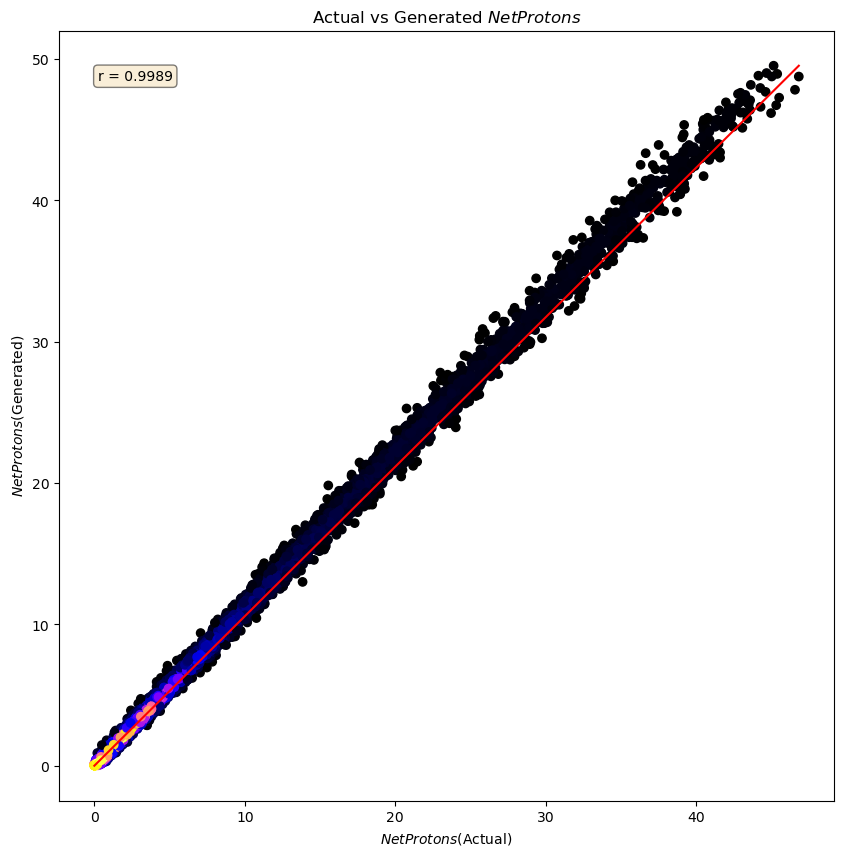

In [4]:
from hydroml.libs.plot import plot_cc_graph, plot_output
from hydroml.libs.moments import Moments
from hydroml.utils.trim import trim

finals = []
models = []
bound_1 = -1
bound_2 = 1

import numpy as np

print(len(data_loader))

for i, data in enumerate(data_loader):
    key = data[0].flatten()
    value = data[1].flatten()

    protons_model = model(key)

    protons_model = protons_model.detach().numpy()

    eta_trim, protons_trim = trim( dataset.eta, value, bound_1, bound_2  )
    _, protons_model_trim = trim( dataset.eta, protons_model, bound_1, bound_2  )

    finals.append( np.trapz( protons_trim, x=eta_trim ) )
    models.append( np.trapz( protons_model_trim, x=eta_trim ) )

finals_moments = Moments(finals)
models_moments = Moments(models)

print("Values for actual final state")
print(finals_moments)

print()

print("Values for model output final state")
print(models_moments)

plot_cc_graph(np.array(finals), np.array(models), "Net Protons")